# Topic 13 Examples

In [3]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
from sympy import init_printing
import sympy

init_printing(use_unicode=True)
print("Sympy version " + sympy.__version__)

a, x, g, X, G, tau = symbols('a x g X G tau', cls = Function)
tau = Symbol('tau', negative=True) 

Sympy version 1.13.2


## Define anticausal transforms

In [4]:
def laplace_transform_ac(g_lt_ac,t,s, NC = True):
    return laplace_transform(g_lt_ac.subs(tau,-t), t, -s, noconds = NC)

def inverse_laplace_transform_ac(G_ilt_ac,s,t):
    return (inverse_laplace_transform(G_ilt_ac.subs(s,-s),s,t).subs(t,-tau))*Heaviside(-tau,1)

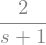

In [5]:
#Example 1
g = 2*exp(-t)*Heaviside(t,0)
G = laplace_transform(g, t, s, noconds = True) # Checking the performance -  Should get 2/s+1
G

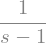

In [6]:
#Example 2
g = exp(t)*Heaviside(t,0)
G = laplace_transform(g, t, s, noconds = True) # Checking the performance -  Should get 1/s-1
G

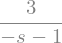

In [7]:
#Example 3
g_ac = 3*sympy.exp(-tau)*Heaviside(-tau)
G_ac = laplace_transform_ac(g_ac,t,s, True) # Checking the performance -  Should get -1/(s+1)
G_ac

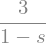

In [8]:
#Example 4
g = 3*exp(tau)*Heaviside(-tau,1)
G = laplace_transform_ac(g, t, s, True) # Checking the performance -  Should get -3/s-1.
G

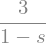

In [9]:
#Example 5
w = 3*exp(-t)*Heaviside(t,1)
W = laplace_transform(g, t, s, True)
G

## Anticausal - Topic 13 - Example 7 - Consider 3 cases for the ROC

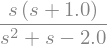

In [10]:
G1 = 2/3/(s-1) # pole at s = 1
G2 = -2/3/(s+2) # pole at s = -2
N(simplify(1+G1+G2),2)

In [11]:
# ROC A Re[s] < -2
g_rocA = inverse_laplace_transform_ac(G1,s,t) + inverse_laplace_transform_ac(1+G2,s,t)
N(g_rocA,4)

In [12]:
# ROC B -2 < Re[s] < 1 
g_rocB = inverse_laplace_transform_ac(G1,s,t) + inverse_laplace_transform(1+G2,s,t)
N(g_rocB,4)

In [13]:
# ROC C Re[s] > 1
g_rocC = inverse_laplace_transform(G1,s,t) + inverse_laplace_transform(1+G2,s,t)
N(g_rocC,4)